In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from scipy.interpolate import spline
import numpy as np
import pandas as pd
def plot_hist(data,names):
    fig, ax = plt.subplots(figsize = (15,8))
    width=0.3
    bins = map(lambda x: x-width/2,range(1,len(data)+1))
    ax.bar(bins,data,width=width)
    ax.set_xticks(map(lambda x: x, range(1,len(data)+1)))
    ax.set_xticklabels(names,rotation=45)
    
    xold = range(1,38)
    xnew = np.linspace(1, 38, 300)
    power_smooth = spline(xold, data, xnew)
    power_smooth[power_smooth<0]=0
    ax.plot(xnew,power_smooth)
    plt.title('Character Count Across Corrected Corpus',y=1.05)
    plt.ylabel('Count')
    plt.xlabel('Character')
    plt.show()

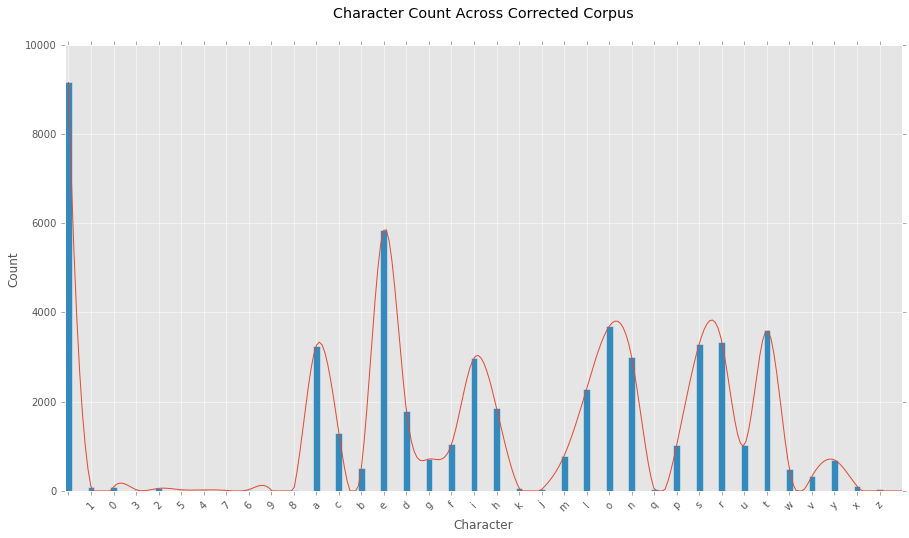

In [57]:
docs = ['train_text/'+f for f in os.listdir('train_text/') if f.endswith('.txt')]
text = []
for doc in docs:
    text.append(read_text(doc))
text = ' '.join(text)

c = Counter(text)
plot_hist(c.values(), c.keys())


In [42]:
df = pd.read_pickle('data/all_data.pickle')
read = pd.read_csv('data/results.csv')
clean = pd.read_csv('data/clean_weld_docs.csv')
df =df[~df['doc'].isin(read['doc'])]
df.head()

,doc,clean_text,legal_text,years,town,range,section
0,DOC100S101_0,paid up oil and gas lease pages 1 of 2 3 8 6 7...,section 11 township 5 north range 66 west more...,5 years from he,[[5]],[[66]],[[11]]
1,DOC100S102_0,e e n ar o k o n a in 20 m paid up re 9 9 6 pa...,section 11 township 5 north range 66 west more...,5 years from he,[[5]],[[66]],[[11]]
2,DOC100S103_0,paid up oil and gas lease produce r s 8 8 3 8 ...,section 14 township 5 north range 66 west more...,5 years from he,[[5]],[[66]],[[14]]
3,DOC100S104_0,paid up oil and gas lease produce r s 8 8 r o ...,section 3 township 5 north range 66 west more ...,4 years from he,[[5]],[[66]],[[3]]
4,DOC100S105_0,paid up oil and gas lease 3 8 6 7 9 2 5 08 22 ...,section 11 township 5 north range 66 west more...,5 years from he,[[5]],[[66]],[[11]]


In [43]:
def condense(lst):
    new_lst = [x for b in lst for x in b]
    return new_lst

In [44]:
cols = ['town','range','section']
for col in cols:
    df[col]=df.apply(lambda x: condense(x[col]),axis=1)

In [56]:
good = pd.DataFrame(columns=['doc','years', 'town', 'range', 'section'])
for i,r in df.iterrows():
    town =r['town']
    rng = r['range']
    sec = r['section']
    for t in town:
        for rn in rng:
            for s in sec:
                good = good.append({'doc':r['doc'],
                                   'years':r['years'], 
                                   'town':t, 
                                   'range':rn, 
                                   'section':s},ignore_index=True)

In [57]:
good.head()

,doc,years,town,range,section
0,DOC100S101_0,5 years from he,5,66,11
1,DOC100S102_0,5 years from he,5,66,11
2,DOC100S103_0,5 years from he,5,66,14
3,DOC100S104_0,4 years from he,5,66,3
4,DOC100S105_0,5 years from he,5,66,11


In [59]:
good = good.append(read,ignore_index=True)

In [61]:
good.to_csv("good.csv",index=False)

In [89]:
good[good['doc'].isin(clean['doc_num'][clean['township'].isnull()])]

,doc,range,section,town,township,years


In [92]:
clean[clean['section'].isnull()]

,start_date,end_date,doc_num,doc_type,href,text,rec_date,section,grantee,page_num,grantor,range,township,new_doc_num,quarter
63,2006-01-29,2006-01-30,DOCC3358749,OIL & GAS LEASE,../eagleweb/viewDoc.jsp?node=DOCC3358749,Rec. Date: 01/30/2006 12:59:00 PM Book Page: ...,01/30/2006 12:59:00 PM,NaN,NaN,2,NaN,NaN,NaN,DOCC3358749,NaN
64,2006-01-29,2006-01-30,DOCC3358746,OIL & GAS LEASE,../eagleweb/viewDoc.jsp?node=DOCC3358746,Rec. Date: 01/30/2006 12:59:00 PM Book Page: ...,01/30/2006 12:59:00 PM,NaN,NaN,2,NaN,NaN,NaN,DOCC3358746,NaN
65,2006-01-29,2006-01-30,DOCC3358748,OIL & GAS LEASE,../eagleweb/viewDoc.jsp?node=DOCC3358748,Rec. Date: 01/30/2006 12:59:00 PM Book Page: ...,01/30/2006 12:59:00 PM,NaN,NaN,2,NaN,NaN,NaN,DOCC3358748,NaN
66,2006-01-29,2006-01-30,DOCC3358747,OIL & GAS LEASE,../eagleweb/viewDoc.jsp?node=DOCC3358747,Rec. Date: 01/30/2006 12:59:00 PM Book Page: ...,01/30/2006 12:59:00 PM,NaN,NaN,2,NaN,NaN,NaN,DOCC3358747,NaN
69,2006-01-29,2006-01-30,DOCC3358750,OIL & GAS LEASE,../eagleweb/viewDoc.jsp?node=DOCC3358750,Rec. Date: 01/30/2006 12:59:00 PM Book Page: ...,01/30/2006 12:59:00 PM,NaN,NaN,2,NaN,NaN,NaN,DOCC3358750,NaN
72,2006-01-29,2006-01-30,DOCC3358751,OIL & GAS LEASE,../eagleweb/viewDoc.jsp?node=DOCC3358751,Rec. Date: 01/30/2006 12:59:00 PM Book Page: ...,01/30/2006 12:59:00 PM,NaN,NaN,2,NaN,NaN,NaN,DOCC3358751,NaN
75,2006-01-29,2006-01-30,DOCC3358756,OIL & GAS LEASE,../eagleweb/viewDoc.jsp?node=DOCC3358756,Rec. Date: 01/30/2006 12:59:00 PM Book Page: ...,01/30/2006 12:59:00 PM,NaN,NaN,2,NaN,NaN,NaN,DOCC3358756,NaN
77,2006-01-30,2006-01-31,DOCC3359007,MEMORANDUM OF LEASE,../eagleweb/viewDoc.jsp?node=DOCC3359007,Rec. Date: 01/31/2006 11:37:00 AM Book Page: ...,01/31/2006 11:37:00 AM,NaN,NaN,4,NaN,NaN,NaN,DOCC3359007,NaN
81,2006-02-02,2006-02-03,DOCC3360358,MEMORANDUM OF LEASE,../eagleweb/viewDoc.jsp?node=DOCC3360358,Rec. Date: 02/03/2006 01:37:00 PM Book Page: ...,02/03/2006 01:37:00 PM,NaN,NaN,7,NaN,NaN,NaN,DOCC3360358,NaN
82,2006-02-02,2006-02-03,DOCC3360361,MEMORANDUM OF LEASE,../eagleweb/viewDoc.jsp?node=DOCC3360361,Rec. Date: 02/03/2006 01:38:00 PM Book Page: ...,02/03/2006 01:38:00 PM,NaN,NaN,8,NaN,NaN,NaN,DOCC3360361,NaN
